In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('advertising.csv')
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [6]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred_lr = model.predict(X_test)

In [10]:
print("R² Score:", r2_score(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))

R² Score: 0.9059011844150826
Mean Squared Error: 2.9077569102710896


In [15]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² score:", r2_score(y_test, y_pred_rf))


MSE: 1.4374328500000009
R² score: 0.9534827934927883


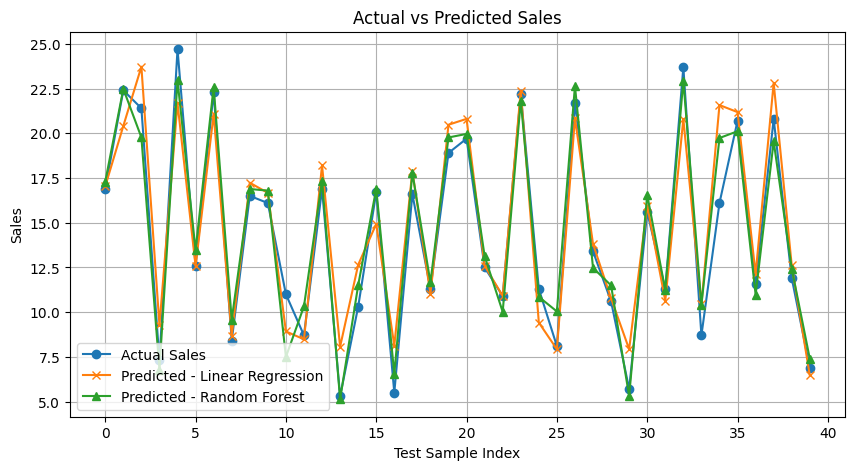

In [13]:
plt.figure(figsize=(10,5))

plt.plot(y_test.values, label='Actual Sales', marker='o')
plt.plot(y_pred_lr, label='Predicted - Linear Regression', marker='x')
plt.plot(y_pred_rf, label='Predicted - Random Forest', marker='^')

plt.title("Actual vs Predicted Sales")
plt.xlabel("Test Sample Index")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()
